In [3]:
import control as ctl
import matplotlib.pyplot as plt

In [11]:
G1 = ctl.tf([1, 0 ,0], [1])
G2 = ctl.tf([1], [1, 1000/3, (10000/3)**2])

In [12]:
print(G1)
print(G2)


s^2
---
 1


            1
-------------------------
s^2 + 333.3 s + 1.111e+07



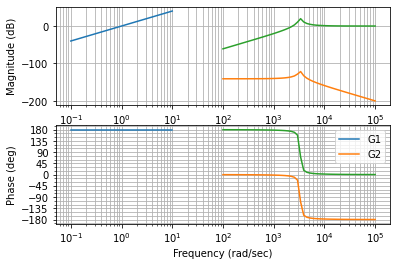

<Figure size 36000x36000 with 0 Axes>

In [24]:
ctl.bode(G1, dB=True, label='G1')
ctl.bode(G2, dB=True, label='G2')
ctl.bode(G1*G2, dB=True)
plt.legend()
plt.figure(figsize=(500,500))
plt.show()